In [39]:
import re
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preparation and exploration

In [41]:
filename = "emotion_dataset.txt"

# Read the file
with open(filename, 'r') as file:
    lines = file.readlines()  

# Each line as a json dictionary
dataset = [json.loads(line) for line in lines]

df = pd.DataFrame(dataset)

# Mostrar las primeras filas del DataFrame
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the firepl...,2
4,i am feeling grouchy,3


In [42]:
# Check missing values
print("\nMissing values per colummn:")
print(df.isnull().sum())


Missing values per colummn:
text     0
label    0
dtype: int64


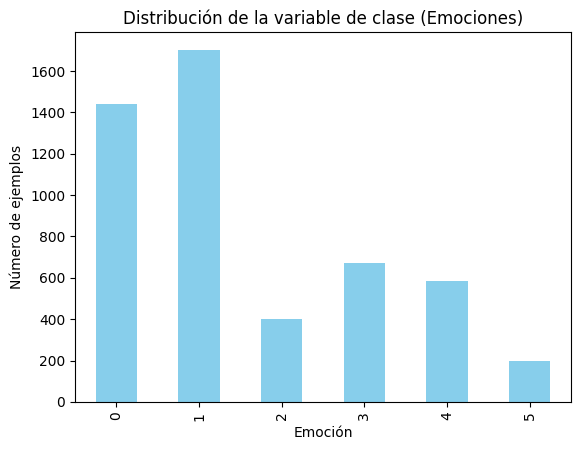

In [43]:
# Data distribution
class_distribution = df['label'].value_counts().sort_index()

class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable de clase (Emociones)')
plt.xlabel('Emoción')
plt.ylabel('Número de ejemplos')
plt.show()


Stadistics:
count    5000.000000
mean       97.761600
std        56.732182
min        11.000000
25%        53.000000
50%        86.000000
75%       130.000000
max       299.000000
Name: text_length, dtype: float64


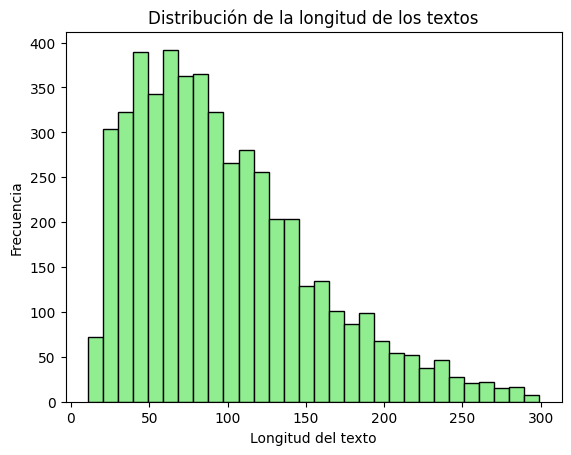

In [44]:
# Text lengths
df['text_length'] = df['text'].apply(len)

print("\nStadistics:")
print(df['text_length'].describe())

plt.hist(df['text_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()


In [45]:
X = df["text"]
y = df["label"]

#temporal variable to divide in test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)

#test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Sizings
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")


Training data size: 3500
Validation data size: 750
Test data size: 750


In [67]:
# Vectorizer TF-IDF. Text format
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training data TF-IDF: {X_train_tfidf.shape}")
print(f"Validation data TF-IDF: {X_val_tfidf.shape}")
print(f"Test data TF-IDF: {X_test_tfidf.shape}")

Training data TF-IDF: (3500, 5000)
Validation data TF-IDF: (750, 5000)
Test data TF-IDF: (750, 5000)


In [65]:
# Labels format
print(f"Tipo de y_train: {type(y_train.iloc[0])}")

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


Tipo de y_train: <class 'numpy.int32'>


# Basic machine learning

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Majority classifier
predicted_labels = [y_train.value_counts().idxmax()]*len(y_test)
print("Majority classifier Accuracy:")
ac_mc =accuracy_score(y_test, predicted_labels)
print(ac_mc)
print('Classification Report:')
cr_mc = classification_report(y_test, predicted_labels)
print(cr_mc)
print('Confusion Matrix:')
cm_mc = confusion_matrix(y_test, predicted_labels)
print(cm_mc)

Majority classifier Accuracy:
0.3373333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.34      1.00      0.50       253
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00        24

    accuracy                           0.34       750
   macro avg       0.06      0.17      0.08       750
weighted avg       0.11      0.34      0.17       750

Confusion Matrix:
[[  0 219   0   0   0   0]
 [  0 253   0   0   0   0]
 [  0  50   0   0   0   0]
 [  0 107   0   0   0   0]
 [  0  97   0   0   0   0]
 [  0  24   0   0   0   0]]


c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [50]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
predicted_knn = knn.predict(X_test_tfidf)
print("KNN Accuracy:")
ac_knn = accuracy_score(y_test, predicted_knn)
print(ac_knn)
print('Classification Report:')
cr_knn = classification_report(y_test, predicted_knn)
print(cr_knn)
print('Confusion Matrix:')
cm_knn = confusion_matrix(y_test, predicted_knn)
print(confusion_matrix(y_test, predicted_knn))


KNN Accuracy:
0.6866666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       219
           1       0.63      0.90      0.74       253
           2       0.67      0.40      0.50        50
           3       0.78      0.50      0.61       107
           4       0.85      0.40      0.55        97
           5       0.50      0.21      0.29        24

    accuracy                           0.69       750
   macro avg       0.69      0.53      0.57       750
weighted avg       0.71      0.69      0.67       750

Confusion Matrix:
[[169  40   1   5   3   1]
 [ 19 228   4   1   1   0]
 [  6  23  20   1   0   0]
 [ 18  34   1  54   0   0]
 [ 19  24   4   7  39   4]
 [  2  13   0   1   3   5]]


In [51]:
# SVM
svm = SVC(C=100)
svm.fit(X_train_tfidf, y_train)
predicted_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:")
ac_svm = accuracy_score(y_test, predicted_svm)
print(ac_svm)
print('Classification Report:')
cr_svm = classification_report(y_test, predicted_svm)
print(cr_svm)
print('Confusion Matrix:')
cm_svm = confusion_matrix(y_test, predicted_svm)
print(cm_svm)


SVM Accuracy:
0.792
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       219
           1       0.75      0.94      0.83       253
           2       0.75      0.54      0.63        50
           3       0.94      0.67      0.78       107
           4       0.83      0.55      0.66        97
           5       0.62      0.21      0.31        24

    accuracy                           0.79       750
   macro avg       0.78      0.64      0.68       750
weighted avg       0.80      0.79      0.78       750

Confusion Matrix:
[[200  11   1   2   5   0]
 [  9 237   5   0   2   0]
 [  6  17  27   0   0   0]
 [ 15  18   2  72   0   0]
 [ 16  21   1   3  53   3]
 [  2  13   0   0   4   5]]


In [52]:
# Decision Trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=25)
dt.fit(X_train_tfidf, y_train)
predicted_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:")
ac_dt = accuracy_score(y_test, predicted_dt)
print(ac_dt)
print('Classification Report:')
cr_dt = classification_report(y_test, predicted_dt)
print(cr_dt)
print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, predicted_dt)
print(cm_dt)

Decision Tree Accuracy:
0.36933333333333335
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.35      1.00      0.52       253
           2       0.00      0.00      0.00        50
           3       0.86      0.06      0.11       107
           4       0.86      0.12      0.22        97
           5       1.00      0.29      0.45        24

    accuracy                           0.37       750
   macro avg       0.51      0.24      0.22       750
weighted avg       0.38      0.37      0.23       750

Confusion Matrix:
[[  0 217   0   1   1   0]
 [  0 252   0   0   1   0]
 [  0  50   0   0   0   0]
 [  0 101   0   6   0   0]
 [  0  85   0   0  12   0]
 [  0  17   0   0   0   7]]


c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [76]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train_tfidf, y_train)
predicted_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:")
ac_rf = accuracy_score(y_test, predicted_rf)
print(ac_rf)
print('Classification Report:')
cr_rf = classification_report(y_test, predicted_rf)
print(cr_rf)
print('Confusion Matrix:')
cm_rf = confusion_matrix(y_test, predicted_rf)
print(cm_rf)

Random Forest Accuracy:
0.784
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       219
           1       0.74      0.88      0.81       253
           2       0.72      0.62      0.67        50
           3       0.83      0.69      0.76       107
           4       0.79      0.71      0.75        97
           5       0.75      0.62      0.68        24

    accuracy                           0.78       750
   macro avg       0.78      0.72      0.75       750
weighted avg       0.79      0.78      0.78       750

Confusion Matrix:
[[176  27   0   7   9   0]
 [ 11 223  10   4   4   1]
 [  3  15  31   1   0   0]
 [ 12  20   0  74   1   0]
 [  8  11   2   3  69   4]
 [  0   5   0   0   4  15]]


In [54]:
# Bagging

bc = BaggingClassifier()
bc.fit(X_train_tfidf, y_train)
predicted_bc = bc.predict(X_test_tfidf)
print("Bagging Accuracy:")
ac_bc = accuracy_score(y_test, predicted_bc)
print(ac_bc)
print('Classification Report:')
cr_bc = classification_report(y_test, predicted_bc)
print(cr_bc)
print('Confusion Matrix:')
cm_bc = confusion_matrix(y_test, predicted_bc)
print(cm_bc)


Bagging Accuracy:
0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       219
           1       0.86      0.87      0.87       253
           2       0.69      0.76      0.72        50
           3       0.83      0.80      0.82       107
           4       0.80      0.77      0.79        97
           5       0.74      0.58      0.65        24

    accuracy                           0.84       750
   macro avg       0.80      0.78      0.79       750
weighted avg       0.84      0.84      0.84       750

Confusion Matrix:
[[196   8   0   7   7   1]
 [  9 221  13   5   5   0]
 [  3   8  38   1   0   0]
 [  7   8   3  86   2   1]
 [  8   7   1   3  75   3]
 [  0   4   0   1   5  14]]


In [55]:
# Gradiant Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train_tfidf, y_train)
predicted_gb = gb.predict(X_test_tfidf)
print("Gradiant Boosting Accuracy:")
ac_gb = accuracy_score(y_test, predicted_gb)
print(ac_gb)
print('Classification Report:')
cr_gb = classification_report(y_test, predicted_gb)
print(cr_gb)
print('Confusion Matrix:')
cm_gb = confusion_matrix(y_test, predicted_gb)
print(cm_gb)

Gradiant Boosting Accuracy:
0.7933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       219
           1       0.70      0.88      0.78       253
           2       0.66      0.82      0.73        50
           3       0.87      0.71      0.78       107
           4       0.87      0.73      0.79        97
           5       0.75      0.75      0.75        24

    accuracy                           0.79       750
   macro avg       0.80      0.78      0.78       750
weighted avg       0.82      0.79      0.80       750

Confusion Matrix:
[[166  43   0   5   4   1]
 [  4 223  16   4   4   2]
 [  0   9  41   0   0   0]
 [  5  24   2  76   0   0]
 [  1  17   3   2  71   3]
 [  0   3   0   0   3  18]]


## Cross validation and Hyperparameter Tuning
We will implement cross validation and Hyperparameter tuning for selected base models which already show promissing results (hight accuracy) so:  
KNN,  
Random Forest,  
Bagging

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
# Cross-validation implementation and K Hyperparameter tuning for KNN

# Create a copy of training data
X_CV = X_val_tfidf.copy()
y_CV = y_val.copy()

# Define the number of folds
folds = 3

# Initialize variables for storing evaluation results and overall scores
eval_core = []
overall_scores = []

# We will check K in the range from 1 to 10
for neigh in range(1, 11):

    # Initialize variables to store fold-specific evaluation metrics
    fold_eval = []

    # Initialize k-fold cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=False)

    for i, (train_index, test_index) in enumerate(skf.split(X_CV, y_CV)):
        # Select data from train and test based on fold indices
        X_CV_train, X_CV_test = X_CV[train_index], X_CV[test_index]
        y_CV_train, y_CV_test = y_CV.iloc[train_index], y_CV.iloc[test_index]

        # Train a KNN classifier with the given parameter k
        knn = KNeighborsClassifier(n_neighbors=neigh)
        knn.fit(X_CV_train, y_CV_train)

        # Predict on the test set
        y_CV_pred = knn.predict(X_CV_test)

        # Compute the accuracy metric for this fold
        accuracy = accuracy_score(y_CV_test, y_CV_pred)
        fold_eval.append(accuracy)

    # Calculate the mean performance across all folds for this k
    mean_accuracy = np.mean(fold_eval)
    print(f'n_neighbours_{neigh}:', mean_accuracy)

    # Append the mean accuracy to the overall scores
    overall_scores.append(mean_accuracy)

# Diagnostic
print('Overall scores:', overall_scores)

# Find the best performing k based on the highest accuracy
best_k = np.argmax(overall_scores) + 1  # Add 1 to convert to 1-based index
print("Best K for KNN:", best_k)

n_neighbours_1: 0.544
n_neighbours_2: 0.504
n_neighbours_3: 0.5293333333333333
n_neighbours_4: 0.5213333333333333
n_neighbours_5: 0.5146666666666667
n_neighbours_6: 0.5
n_neighbours_7: 0.5066666666666667
n_neighbours_8: 0.5066666666666667
n_neighbours_9: 0.484
n_neighbours_10: 0.4746666666666666
Overall scores: [0.544, 0.504, 0.5293333333333333, 0.5213333333333333, 0.5146666666666667, 0.5, 0.5066666666666667, 0.5066666666666667, 0.484, 0.4746666666666666]
Best K for KNN: 1


In [58]:
# Random Forest Hyperparameter tuning using Grid Search with cross validation throught gridsearch Object

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50],  # Adjust the range as needed
    'min_samples_split': [10, 30],
    'min_samples_leaf': [1, 10],    
    'max_features': ['sqrt', 'log2', None]
}

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
print("start search")
grid_search.fit(X_val_tfidf, y_val)
print("done search")

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_tfidf, y_train)
print("done fit best")

# Make predictions on your test data
predicted_rf = best_rf.predict(X_test_tfidf)

# Calculate the accuracy of the tuned Random Forest
accuracy_rf = accuracy_score(y_test, predicted_rf)
print("Tuned Decision Tree Accuracy:", accuracy_rf)
print("Best Hyperparameters:", best_params)

start search


KeyboardInterrupt: 

In [70]:
# Random Search for Random Forest with cross validation
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 20, 50]
}

# random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3)
random_search_rf = GridSearchCV(RandomForestClassifier(), param_dist, cv=5, scoring='accuracy', n_jobs=-1)
random_search_rf.fit(X_val_tfidf, y_val)
best_rf = random_search_rf.best_estimator_
predicted_best_rf = best_rf.predict(X_test_tfidf)
accuracy_best_rf = accuracy_score(y_test, predicted_best_rf)
print("Best Random Forest Accuracy:", accuracy_best_rf)

Best Random Forest Accuracy: 0.5413333333333333


In [ ]:
# Hyperparameter tuning for Bagging using Grid Search with cross validation
param_grid = {
              'n_estimators': [10, 20, 30],
              'max_samples': [1, 2, 3],
              'max_features': [1, 2, 3],
              'bootstrap': [True, False],
              'bootstrap_features': [True, False],
              'warm_start': [True, False]
}

bc = BaggingClassifier()

grid_search = GridSearchCV(bc, param_grid, cv=3)
grid_search.fit(X_val_tfidf, y_val)
best_bc = grid_search.best_estimator_
predicted_best_bc = best_bc.predict(X_test_tfidf)
accuracy_best_bc = accuracy_score(y_test, predicted_best_bc)
print("Best Bagging Accuracy:", accuracy_best_bc)
print("Best Hyperparameters:", grid_search.best_params_)

Best Bagging Accuracy: 0.3373333333333333
Best Hyperparameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 2, 'max_samples': 2, 'n_estimators': 30, 'warm_start': True}


# Report

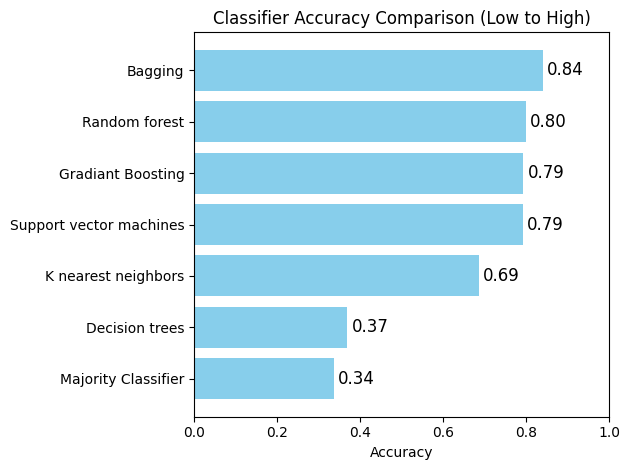

In [63]:
# Create a plot for the results
results = [ac_svm, ac_rf, ac_knn, ac_dt, ac_mc, ac_bc, ac_gb]
classifiers = ['Support vector machines', 'Random forest', 'K nearest neighbors', 'Decision trees', 'Majority Classifier', 'Bagging', 'Gradiant Boosting']

# Sort results and classifiers in ascending order of accuracy
sorted_results, sorted_classifiers = zip(*sorted(zip(results, classifiers)))

# Create a bar plot
plt.barh(sorted_classifiers, sorted_results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison (Low to High)')
plt.xlim(0, 1.0)  # Set the x-axis limits from 0 to 1 for accuracy values

# Annotate the bars with accuracy values
for i, result in enumerate(sorted_results):
    plt.text(result + 0.01, i, f'{result:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
results = []